# DOCSIS 3.1 Medium Code Performance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import sdfec_client

%matplotlib inline

### Hardware Setup

In [2]:
client = sdfec_client.SDFECClient("http://localhost:8230/api")

In [3]:
client.status;

In [4]:
docsis_medium_code = sdfec_client.parse_yaml("docsis_31_medium.sdfec.yml")

In [5]:
docsis_medium_code_id = client.add_code(docsis_medium_code)

### Hardware Simulation

In [6]:
snrs = np.linspace(3, 9, (9-3)*4, endpoint=False)
docsis_medium_results = client.simulate(docsis_medium_code_id, snrs, snr_scales=np.ones_like(snrs)*4, term_time=(60*60), term_errors=1e2, max_iterations=32).wait_progress()

FloatProgress(value=0.0, bar_style='info', description='Running: ', max=1.0)

In [7]:
# Reference Data from Xilinx

docsis_medium_ref = np.array([[3, 0.09314376984126985],
 [3.25, 0.08651821428571428],
 [3.5, 0.07991150793650793],
 [3.75, 0.07338222222222222],
 [4, 0.06675714285714286],
 [4.25, 0.06019753968253969],
 [4.5, 0.05342152777777778],
 [4.75, 0.04613039682539682],
 [5, 0.03792646825396825],
 [5.25, 0.02457871031746032],
 [5.5, 0.00533875],
 [5.75, 0.0001281459435626102],
 [6, 2.150350329607709e-07],
 [6.25, 4.861353862662688e-10],
 [6.5, 2.141238513541631e-10],
 [6.75, 9.516413426099798e-11]])

## Results

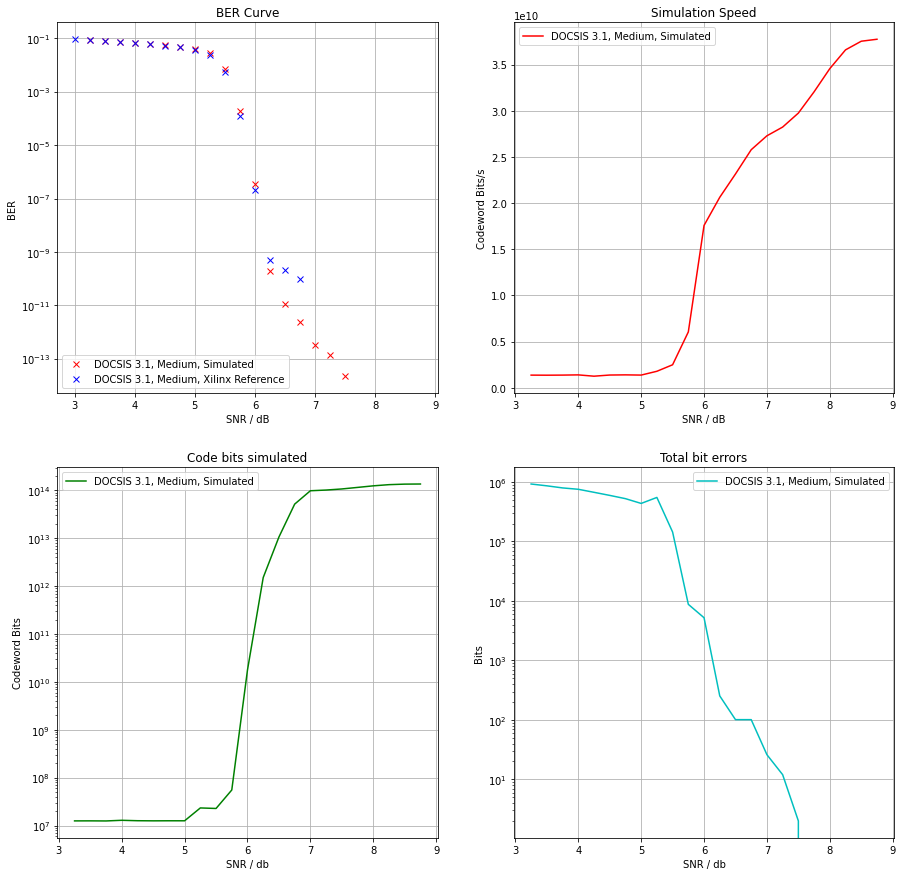

In [8]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2)

fig.set_size_inches(15, 15)

ax1.set_title("BER Curve")
ax1.set_yscale("log")

ax1.plot(snrs[1:], docsis_medium_results["bers"][1:], "rx")
ax1.plot(docsis_medium_ref[:,0], docsis_medium_ref[:,1], "bx")

ax1.set_xlabel("SNR / dB")
ax1.set_ylabel("BER")

ax1.legend(["DOCSIS 3.1, Medium, Simulated",
            "DOCSIS 3.1, Medium, Xilinx Reference"
           ])

ax1.grid()

##############
ax2.set_title("Simulation Speed")
          
ax2.plot(snrs[1:], docsis_medium_results["speeds"][1:], "r")

ax2.set_xlabel("SNR / dB")
ax2.set_ylabel("Codeword Bits/s")

ax2.legend(["DOCSIS 3.1, Medium, Simulated"])

ax2.grid()

##############
ax3.set_title("Code bits simulated")
ax3.set_yscale("log")

ax3.plot(snrs[1:], np.array(docsis_medium_results["finished_blocks"][1:]) * docsis_medium_code["n"], "g")

ax3.set_xlabel("SNR / db")
ax3.set_ylabel("Codeword Bits")

ax3.legend(["DOCSIS 3.1, Medium, Simulated"])
ax3.grid()

##############
ax4.set_title("Total bit errors")
ax4.set_yscale("log")

ax4.plot(snrs[1:], docsis_medium_results["bit_errors"][1:], "c")

ax4.set_xlabel("SNR / db")
ax4.set_ylabel("Bits")

ax4.legend(["DOCSIS 3.1, Medium, Simulated"])
ax4.grid()


In [16]:
simulated_codword_bits = np.array(docsis_medium_results["finished_blocks"][1:]).sum()*5940.0
print("For these results, in total {:e} codeword bits were simulated!".format(simulated_codword_bits))

For these results, in total 1.013703e+15 codeword bits were simulated!
